In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import cumtrapz  # For numerical integration
from scipy.stats import norm
import time

In [2]:
spot_bnb = pd.read_csv("bnb_spot.csv")
futures_bnb = pd.read_csv("bnb_k.csv")
options_bnb = pd.read_csv("bnb_option.csv")
funding_bnb = pd.read_csv("bnb_funding.csv") 

In [3]:
future_ticker = pd.read_csv('BNB_ticker.csv')

In [4]:
spot_qnt = pd.read_csv("qnt_spot.csv")
futures_qnt = pd.read_csv("qnt_k.csv")
funding_qnt = pd.read_csv("qnt_funding.csv") 

spot_mkr = pd.read_csv("mkr_spot.csv")
futures_mkr = pd.read_csv("mkr_k.csv")
funding_mkr = pd.read_csv("mkr_funding.csv")


In [5]:
future_ticker_qnt = pd.read_csv('qnt_ticker.csv')
future_ticker_mkr = pd.read_csv('mkr_ticker.csv')

In [6]:
print(spot_bnb.columns)
print(futures_bnb.columns)
print(options_bnb.columns)
print(funding_bnb.columns)
print(future_ticker.columns)


Index(['1682899200000', '337.50000000', '339.60000000', '331.40000000',
       '333.90000000', '337753.26700000', '1682927999999',
       '113200044.42050000', '154212', '165181.78600000', '55357391.83030000',
       '0'],
      dtype='object')
Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_volume', 'count', 'taker_buy_volume', 'taker_buy_quote_volume',
       'ignore'],
      dtype='object')
Index(['date', 'hour', 'symbol', 'underlying', 'type', 'strike', 'open',
       'high', 'low', 'close', 'volume_contracts', 'volume_usdt',
       'best_bid_price', 'best_ask_price', 'best_bid_qty', 'best_ask_qty',
       'best_buy_iv', 'best_sell_iv', 'mark_price', 'mark_iv', 'delta',
       'gamma', 'vega', 'theta', 'openinterest_contracts',
       'openinterest_usdt'],
      dtype='object')
Index(['calc_time', 'funding_interval_hours', 'last_funding_rate'], dtype='object')
Index(['update_id', 'best_bid_price', 'best_bid_qty', 'best_ask_price',
       'b

In [7]:
# Sample code for renaming columns
spot_bnb.rename(columns={
    '1682899200000': 'Timestamp',
    '337.50000000': 'Open',
    '339.60000000': 'High',
    '331.40000000': 'Low',
    '333.90000000': 'Close',
    '337753.26700000': 'Volume',
    '1682927999999': 'Close_Time',
    '113200044.42050000': 'Quote_Volume',
    '154212': 'Count',
    '165181.78600000': 'Taker_Buy_Volume',
    '55357391.83030000': 'Taker_Buy_Quote_Volume',
    '0': 'Ignore'
}, inplace=True)

In [8]:
spot_qnt.rename(columns={
    '1685577600000': 'Timestamp',
    '116.70000000': 'Open',
    '119.90000000': 'High',
    '115.40000000': 'Low',
    '118.50000000': 'Close',
    '13951.50100000': 'Volume',
    '1685606399999': 'Close_Time',
    '1643844.77450000': 'Quote_Volume',
    '8050': 'Count',
    '7402.77400000': 'Taker_Buy_Volume',
    '872566.48110000': 'Taker_Buy_Quote_Volume',
    'Ignore': 'Ignore'
}, inplace=True)

spot_mkr.rename(columns={
    '1685577600000': 'Timestamp',
    '636.00000000': 'Open',
    '638.00000000': 'High',
    '626.00000000': 'Low',
    '632.00000000': 'Close',
    '528.76790000': 'Volume',
    '1685606399999': 'Close_Time',
    '333756.58100000': 'Quote_Volume',
    '1624': 'Count',
    '251.40720000': 'Taker_Buy_Volume',
    '...': 'Taker_Buy_Quote_Volume',  # replace '...' with the actual column name
    '0': 'Ignore'
}, inplace=True)

In [9]:
print("Columns in spot_bnb:")
print(spot_bnb.columns)
print("")

print("Columns in futures_bnb:")
print(futures_bnb.columns)
print("")

print("Columns in options_bnb:")
print(options_bnb.columns)
print("")

print("Columns in funding_bnb:")
print(funding_bnb.columns)
print("")

print("Columns in future_ticker:")
print(future_ticker.columns)
print("")


Columns in spot_bnb:
Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close_Time',
       'Quote_Volume', 'Count', 'Taker_Buy_Volume', 'Taker_Buy_Quote_Volume',
       'Ignore'],
      dtype='object')

Columns in futures_bnb:
Index(['open_time', 'open', 'high', 'low', 'close', 'volume', 'close_time',
       'quote_volume', 'count', 'taker_buy_volume', 'taker_buy_quote_volume',
       'ignore'],
      dtype='object')

Columns in options_bnb:
Index(['date', 'hour', 'symbol', 'underlying', 'type', 'strike', 'open',
       'high', 'low', 'close', 'volume_contracts', 'volume_usdt',
       'best_bid_price', 'best_ask_price', 'best_bid_qty', 'best_ask_qty',
       'best_buy_iv', 'best_sell_iv', 'mark_price', 'mark_iv', 'delta',
       'gamma', 'vega', 'theta', 'openinterest_contracts',
       'openinterest_usdt'],
      dtype='object')

Columns in funding_bnb:
Index(['calc_time', 'funding_interval_hours', 'last_funding_rate'], dtype='object')

Columns in future_ticker:
Index(['u

In [10]:
# converting columns in various DataFrames to datetime data types
spot_bnb['datetime'] = pd.to_datetime(spot_bnb['Timestamp'], unit='ms')
futures_bnb['datetime'] = pd.to_datetime(futures_bnb['open_time'], unit='ms')
funding_bnb['datetime'] = pd.to_datetime(funding_bnb['calc_time'], unit='ms')
future_ticker['datetime'] = pd.to_datetime(future_ticker['event_time'], unit='ms')

options_bnb['datetime_str'] = options_bnb['date'] + ' ' + options_bnb['hour'].astype(str).str.zfill(2) + ':00:00'
options_bnb['datetime'] = pd.to_datetime(options_bnb['datetime_str'])



In [11]:
spot_qnt['datetime'] = pd.to_datetime(spot_qnt['Timestamp'], unit='ms')
futures_qnt['datetime'] = pd.to_datetime(futures_qnt['open_time'], unit='ms')
funding_qnt['datetime'] = pd.to_datetime(funding_qnt['calc_time'], unit='ms')
future_ticker_qnt['datetime'] = pd.to_datetime(future_ticker_qnt['event_time'], unit='ms')

spot_mkr['datetime'] = pd.to_datetime(spot_mkr['Timestamp'], unit='ms')
futures_mkr['datetime'] = pd.to_datetime(futures_mkr['open_time'], unit='ms')
funding_mkr['datetime'] = pd.to_datetime(funding_mkr['calc_time'], unit='ms')
future_ticker_mkr['datetime'] = pd.to_datetime(future_ticker_mkr['event_time'], unit='ms')

In [12]:
# setting the 'datetime' column created in the previous step as the index for each DataFrame
spot_bnb.set_index('datetime', inplace=True)
futures_bnb.set_index('datetime', inplace=True)
options_bnb.set_index('datetime', inplace=True)
funding_bnb.set_index('datetime', inplace=True)
future_ticker.set_index('datetime', inplace=True)

In [13]:
spot_qnt.set_index('datetime', inplace=True)
futures_qnt.set_index('datetime', inplace=True)
funding_qnt.set_index('datetime', inplace=True)
future_ticker_qnt.set_index('datetime', inplace=True)

spot_mkr.set_index('datetime', inplace=True)
futures_mkr.set_index('datetime', inplace=True)
funding_mkr.set_index('datetime', inplace=True)
future_ticker_mkr.set_index('datetime', inplace=True)

In [14]:
spot_futures = spot_bnb.merge(futures_bnb, left_index=True, right_index=True, suffixes=('_spot', '_futures'))

In [15]:
spot_futures_qnt = spot_qnt.merge(futures_qnt,left_index=True, right_index=True, suffixes=('_spot', '_futures'))
spot_futures_mkr = spot_mkr.merge(futures_mkr,left_index=True, right_index=True, suffixes=('_spot', '_futures'))

In [16]:
print(spot_futures.columns)

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close_Time',
       'Quote_Volume', 'Count', 'Taker_Buy_Volume', 'Taker_Buy_Quote_Volume',
       'Ignore', 'open_time', 'open', 'high', 'low', 'close', 'volume',
       'close_time', 'quote_volume', 'count', 'taker_buy_volume',
       'taker_buy_quote_volume', 'ignore'],
      dtype='object')


In [17]:
# BNB spot price
spot_futures['Close'].describe()

count    181.000000
mean     247.773481
std       17.992167
min      224.000000
25%      238.500000
50%      242.600000
75%      247.700000
max      308.000000
Name: Close, dtype: float64

In [18]:
spot_futures_qnt['Close'].describe()

count    181.000000
mean     105.428729
std        5.077669
min       96.500000
25%      101.900000
50%      103.700000
75%      108.700000
max      119.000000
Name: Close, dtype: float64

In [19]:
spot_futures_mkr['Close'].describe()

count     181.000000
mean      848.546961
std       196.252655
min       581.000000
25%       676.000000
50%       835.000000
75%       978.000000
max      1283.000000
Name: Close, dtype: float64

# Fetched spot data and future data period

In [20]:
# Get the starting date/index of the merged DataFrame
starting_date1 = spot_futures.index.min()
print(f"Starting date: {starting_date1}")

# Get the ending date/index of the merged DataFrame
ending_date1 = spot_futures.index.max()
print(f"Ending date: {ending_date1}")


Starting date: 2023-06-01 08:00:00
Ending date: 2023-07-31 16:00:00


In [21]:
spot_futures_mkr= spot_futures_mkr.loc[starting_date1:ending_date1]
spot_futures_qnt= spot_futures_qnt.loc[starting_date1:ending_date1]
spot_futures = spot_futures.loc[starting_date1:ending_date1]

In [22]:
print(spot_futures.columns)

# spot upper letter, future lower letter
# spot_futures from 2023-05-01 09:00:00 to 2023-07-31 17:00:00

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close_Time',
       'Quote_Volume', 'Count', 'Taker_Buy_Volume', 'Taker_Buy_Quote_Volume',
       'Ignore', 'open_time', 'open', 'high', 'low', 'close', 'volume',
       'close_time', 'quote_volume', 'count', 'taker_buy_volume',
       'taker_buy_quote_volume', 'ignore'],
      dtype='object')


In [23]:
spot_option = spot_bnb.merge(options_bnb, left_index=True, right_index= True, suffixes=('_spot', '_option'))

In [24]:
print(spot_option.columns)

# spot upper letter, option lower

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close_Time',
       'Quote_Volume', 'Count', 'Taker_Buy_Volume', 'Taker_Buy_Quote_Volume',
       'Ignore', 'date', 'hour', 'symbol', 'underlying', 'type', 'strike',
       'open', 'high', 'low', 'close', 'volume_contracts', 'volume_usdt',
       'best_bid_price', 'best_ask_price', 'best_bid_qty', 'best_ask_qty',
       'best_buy_iv', 'best_sell_iv', 'mark_price', 'mark_iv', 'delta',
       'gamma', 'vega', 'theta', 'openinterest_contracts', 'openinterest_usdt',
       'datetime_str'],
      dtype='object')


In [25]:
spot_option['close'].describe()

count    7462.000000
mean        7.098030
std        10.532039
min         0.000000
25%         0.200000
50%         1.900000
75%        10.000000
max        69.800000
Name: close, dtype: float64

In [26]:
# Get the starting date/index of the spot and option DataFrame 
starting_date = spot_option.index.min()
print(f"Starting date: {starting_date}")

# Get the ending date/index of the merged DataFrame
ending_date = spot_option.index.max()
print(f"Ending date: {ending_date}")


Starting date: 2023-06-07 00:00:00
Ending date: 2023-07-21 08:00:00


# Statistic of Dataframe:

In [27]:
print(spot_option.columns)

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume', 'Close_Time',
       'Quote_Volume', 'Count', 'Taker_Buy_Volume', 'Taker_Buy_Quote_Volume',
       'Ignore', 'date', 'hour', 'symbol', 'underlying', 'type', 'strike',
       'open', 'high', 'low', 'close', 'volume_contracts', 'volume_usdt',
       'best_bid_price', 'best_ask_price', 'best_bid_qty', 'best_ask_qty',
       'best_buy_iv', 'best_sell_iv', 'mark_price', 'mark_iv', 'delta',
       'gamma', 'vega', 'theta', 'openinterest_contracts', 'openinterest_usdt',
       'datetime_str'],
      dtype='object')


In [98]:
def calculate_statistics(df, column_name):
    # Make sure the column exists in the DataFrame
    if column_name not in df.columns:
        print(f"Column '{column_name}' not found in DataFrame.")
        return

    # Extract the relevant Series
    prices = df[column_name]

    # Mean
    mean = prices.mean()
    print(f"Mean of {column_name}: {mean}")

    # Median 
    median = prices.median()
    print(f"Median of {column_name}: {median}")

    # Standard deviation
    std = prices.std()
    print(f"Standard deviation of {column_name}: {std}")

    # Daily returns
    returns = prices.pct_change()

    # Mean return
    mean_return = returns.mean()
    print(f"Mean return of {column_name}: {mean_return}")

    # Volatility
    vol = (returns.std() * (252 ** 0.5))
    print(f"Volatility of {column_name}: {vol}") # annulized volatility based on daily returns

    # Sharpe Ratio
    if vol != 0:  # Avoid division by zero
        sharpe = mean_return / vol
        print(f"Sharpe Ratio of {column_name}: {sharpe}")
    else:
        print(f"Sharpe Ratio of {column_name}: Undefined (volatility is zero)")

print("---BNB FUTURE---")
calculate_statistics(spot_futures, 'close') # feched future and spot, future's statistic
print("---BNB SPOT---")
calculate_statistics(spot_futures, 'Close') # fetched future and spot, spot's statistic

print("---MKR FUTURE---")
calculate_statistics(spot_futures_mkr, 'close') # feched future and spot, future's statistic
print("---MKR SPOT---")
calculate_statistics(spot_futures_mkr, 'Close') # fetched future and spot, spot's statistic


---BNB FUTURE---
Mean of close: 247.77055248618785
Median of close: 242.7
Standard deviation of close: 18.013217854421264
Mean return of close: -0.0011583071657105513
Volatility of close: 0.2713396869209669
Sharpe Ratio of close: -0.00426884536815999
---BNB SPOT---
Mean of Close: 247.77348066298342
Median of Close: 242.6
Standard deviation of Close: 17.99216692328796
Mean return of Close: -0.001160824992455863
Volatility of Close: 0.2678441636046733
Sharpe Ratio of Close: -0.004333956644167135
---MKR FUTURE---
Mean of close: 848.2060773480663
Median of close: 834.7
Standard deviation of close: 196.1896843379856
Mean return of close: 0.004018516352912886
Volatility of close: 0.446892326206902
Sharpe Ratio of close: 0.00899213550391643
---MKR SPOT---
Mean of Close: 848.5469613259669
Median of Close: 835.0
Standard deviation of Close: 196.25265533700755
Mean return of Close: 0.004013672212375173
Volatility of Close: 0.44536161711211164
Sharpe Ratio of Close: 0.00901216462792932


In [99]:
print("---QNT FUTURE---")
calculate_statistics(spot_futures_qnt, 'close') # feched future and spot, future's statistic
print("---QNT SPOT---")
calculate_statistics(spot_futures_qnt, 'Close') # fetched future and spot, spot's statistic

---QNT FUTURE---
Mean of close: 105.34187845303867
Median of close: 103.6
Standard deviation of close: 5.0758123385577765
Mean return of close: -0.0001540515202377758
Volatility of close: 0.2934876600687096
Sharpe Ratio of close: -0.0005248994802769908
---QNT SPOT---
Mean of Close: 105.42872928176794
Median of Close: 103.7
Standard deviation of Close: 5.077669307716554
Mean return of Close: -0.00016089167774992351
Volatility of Close: 0.2910201879755052
Sharpe Ratio of Close: -0.0005528540094389107


# Basis, volatility and sharpe ratio of BNBUSDT futures

In [29]:
# Basis: future - spot
basis_future = spot_futures['close'] - spot_futures['Close']

# Daily returns
future_returns = spot_futures['close'].pct_change()

# Mean return
mean_return = future_returns.mean() #  -0.0011583071657105513
print(mean_return) 

# Volatility
vol = future_returns.std() * 252**0.5  # 0.2713396869209669
print(vol)

# Sharpe Ratio
sharpe = mean_return / vol  # -0.00426884536815999
print(sharpe)


-0.0011583071657105513
0.2713396869209669
-0.00426884536815999


In [30]:
# Basis: QNT
basis_future_qnt = spot_futures_qnt['close'] - spot_futures_qnt['Close']
# Basis: MKR
basis_future_mkr = spot_futures_mkr['close'] - spot_futures_mkr['Close']

# Daily returns
future_returns_qnt = spot_futures_qnt['close'].pct_change()
future_returns_mkr = spot_futures_mkr['close'].pct_change()

# Mean return
mean_return_qnt = future_returns_qnt.mean() 
print('mean_return_qnt',mean_return_qnt) 

mean_return_mkr = future_returns_mkr.mean() 
print('mean_return_mkr',mean_return_mkr) 

# Volatility
vol_qnt = future_returns_qnt.std() * 252**0.5  
print('vol_qnt', vol_qnt)
vol_mkr = future_returns_mkr.std() * 252**0.5  
print('vol_mkr' ,vol_mkr)

# Sharpe Ratio
sharpe_qnt = mean_return_qnt/ vol_qnt  
print('sharpe_qnt',sharpe_qnt)
sharpe_mkr = mean_return_mkr / vol_mkr 
print('sharpe_mkr',sharpe_mkr)

mean_return_qnt -0.0001540515202377758
mean_return_mkr 0.004018516352912886
vol_qnt 0.2934876600687096
vol_mkr 0.446892326206902
sharpe_qnt -0.0005248994802769908
sharpe_mkr 0.00899213550391643


# Funding rate during this period

In [193]:
# Merge funding on index 
merged = spot_futures.merge(funding_bnb, left_index=True, right_index=True) 

In [32]:
merged_mkr = spot_futures_mkr.merge(funding_mkr, left_index=True, right_index=True)
merged_qnt = spot_futures_qnt.merge(funding_qnt, left_index=True, right_index=True)

In [33]:
# Extract funding data for period
funding_period = funding_bnb.loc[starting_date1:ending_date1]

avg_funding_rate = funding_period['last_funding_rate'].mean()  # close to 0

print(f"Metrics for the period from {starting_date1} to {ending_date1} with granularity of 8 hours")
print(f"Average funding rate: {avg_funding_rate}")

Metrics for the period from 2023-06-01 08:00:00 to 2023-07-31 16:00:00 with granularity of 8 hours
Average funding rate: -8.719983425414365e-05


In [34]:
# Extract funding data for period
funding_period_mkr = funding_mkr.loc[starting_date1:ending_date1]

avg_funding_rate_mkr = funding_period_mkr['last_funding_rate'].mean()

print(f"Metrics for the period from {starting_date1} to {ending_date1} with granularity of 8 hours")
print(f"Average funding rate: {avg_funding_rate_mkr}")

Metrics for the period from 2023-06-01 08:00:00 to 2023-07-31 16:00:00 with granularity of 8 hours
Average funding rate: 9.12439226519337e-05


In [35]:
# Extract funding data for period
funding_period_qnt = funding_qnt.loc[starting_date1:ending_date1]

avg_funding_rate_qnt = funding_period_qnt['last_funding_rate'].mean()

print(f"Metrics for the period from {starting_date1} to {ending_date1} with granularity of 8 hours")
print(f"Average funding rate: {avg_funding_rate_qnt}")

Metrics for the period from 2023-06-01 08:00:00 to 2023-07-31 16:00:00 with granularity of 8 hours
Average funding rate: -4.7873204419889504e-05


# Market metircs during this period

## Market metrics for BNB: (for some unkown reson doesn't work when rerun this file.)
Metrics for the period from 2023-06-01 08:00:00 to 2023-07-31 16:00:00 with granularity in millisecond.

Market depth: 12118759919.590008

Average spread: 0.011090547745831701

Average price impact: 0.0003617555757797418

In [36]:
future_ticker_filtered = future_ticker.loc[starting_date1:ending_date1].copy()

# Calculate depth as sum of bid and ask sizes
market_depth = future_ticker_filtered['best_bid_qty'].sum() + future_ticker_filtered['best_ask_qty'].sum()

# Calculate spread
future_ticker_filtered['spread'] = future_ticker_filtered['best_ask_price'] - future_ticker_filtered['best_bid_price']
average_spread = future_ticker_filtered['spread'].mean()

# Calculate average price impact
future_ticker_filtered['price_impact'] = future_ticker_filtered['spread'] / (future_ticker_filtered['best_bid_qty'] + future_ticker_filtered['best_ask_qty'])
average_price_impact = future_ticker_filtered['price_impact'].mean()

print(f"Metrics for the period from {starting_date1} to {ending_date1} with granularity in millisecond.")
print(f"Market depth: {market_depth}")
print(f"Average spread: {average_spread}")
print(f"Average price impact: {average_price_impact}")

KeyError: Timestamp('2023-06-01 08:00:00')

# QNT Tickerbook Metric

In [37]:
future_ticker_filtered_qnt = future_ticker_qnt.loc[starting_date1:ending_date1].copy()

# Calculate depth as sum of bid and ask sizes
market_depth_qnt = future_ticker_filtered_qnt['best_bid_qty'].sum() + future_ticker_filtered_qnt['best_ask_qty'].sum()

# Calculate spread
future_ticker_filtered_qnt['spread'] = future_ticker_filtered_qnt['best_ask_price'] - future_ticker_filtered_qnt['best_bid_price']
average_spread_qnt = future_ticker_filtered_qnt['spread'].mean()

# Calculate average price impact
future_ticker_filtered_qnt['price_impact'] = future_ticker_filtered_qnt['spread'] / (future_ticker_filtered_qnt['best_bid_qty'] + future_ticker_filtered_qnt['best_ask_qty'])
average_price_impact_qnt = future_ticker_filtered_qnt['price_impact'].mean()

print(f"Metrics for the period from {starting_date1} to {ending_date1} with granularity in millisecond.")
print(f"Market depth: {market_depth_qnt}")
print(f"Average spread: {average_spread_qnt}")
print(f"Average price impact: {average_price_impact_qnt}")

Metrics for the period from 2023-06-01 08:00:00 to 2023-07-31 16:00:00 with granularity in millisecond.
Market depth: 287658277.5999999
Average spread: 0.020735763325514675
Average price impact: 0.003651874080369696


# MKR TickerBook Metric

In [38]:
future_ticker_filtered_mkr = future_ticker_mkr.loc[starting_date1:ending_date1].copy()

# Calculate depth as sum of bid and ask sizes
market_depth_mkr = future_ticker_filtered_mkr['best_bid_qty'].sum() + future_ticker_filtered_mkr['best_ask_qty'].sum()

# Calculate spread
future_ticker_filtered_mkr['spread'] = future_ticker_filtered_mkr['best_ask_price'] - future_ticker_filtered_mkr['best_bid_price']
average_spread_mkr = future_ticker_filtered_mkr['spread'].mean()

# Calculate average price impact
future_ticker_filtered_mkr['price_impact'] = future_ticker_filtered_mkr['spread'] / (future_ticker_filtered_mkr['best_bid_qty'] + future_ticker_filtered_mkr['best_ask_qty'])
average_price_impact_mkr = future_ticker_filtered_mkr['price_impact'].mean()

print(f"Metrics for the period from {starting_date1} to {ending_date1} with granularity in millisecond.")
print(f"Market depth: {market_depth_mkr}")
print(f"Average spread: {average_spread_mkr}")
print(f"Average price impact: {average_price_impact_mkr}")


Metrics for the period from 2023-06-01 08:00:00 to 2023-07-31 16:00:00 with granularity in millisecond.
Market depth: 304444096.25999993
Average spread: 0.1441274236825864
Average price impact: 0.11231927728136924


# Future and perp future formula

In [39]:
# Parameters for future and perpetual futrue:

start = pd.to_datetime('2023-06-01 08:00:00')
end = pd.to_datetime('2023-07-21 16:00:00')

S = merged['Close']  
F = merged['close']

S_mkr = merged_mkr['Close']
S_qnt = merged_qnt['Close']

F_mkr = merged_mkr['close']
F_qnt = merged_qnt['close']

r = 0.03

# Calculate the constant time to maturity T_t based on the start and end dates
T_t_constant = (end - start).total_seconds() / (365 * 24 * 3600)  # Convert to fraction of a year



    
# kappa = 1095 used in the paper, funding fee paid /8 hours (480 minutes or 1 years)

kappa = 1095


In [131]:
F.head()

datetime
2023-06-01 16:00:00    305.12
2023-06-02 00:00:00    307.14
2023-06-03 00:00:00    306.11
2023-06-04 00:00:00    306.94
2023-06-04 08:00:00    306.72
Name: close, dtype: float64

In [132]:
# Perpetual Future data which is the data we collected 

F_perpetual_theory = F-305.12
F_perpetual_theory_qnt = F_qnt-115.57
F_perpetual_theory_mkr = F_mkr-641.1

In [57]:
print(T_t_constant)

0.13789954337899543


# Future price, assumming the maturity date is the period between the data fetched

In [63]:
# Future Pricing calculated based on the future price model

F_theory = S * np.exp(r * T_t_constant)
F_theory = pd.Series(F_theory, index=F_perpetual_theory.index)

F_theory_qnt = S_qnt * np.exp(r * T_t_constant)
F_theory_qnt = pd.Series(F_theory_qnt, index=F_perpetual_theory_qnt.index)

F_theory_mkr = S_mkr * np.exp(r * T_t_constant)
F_theory_mkr = pd.Series(F_theory_mkr, index=F_perpetual_theory_mkr.index)

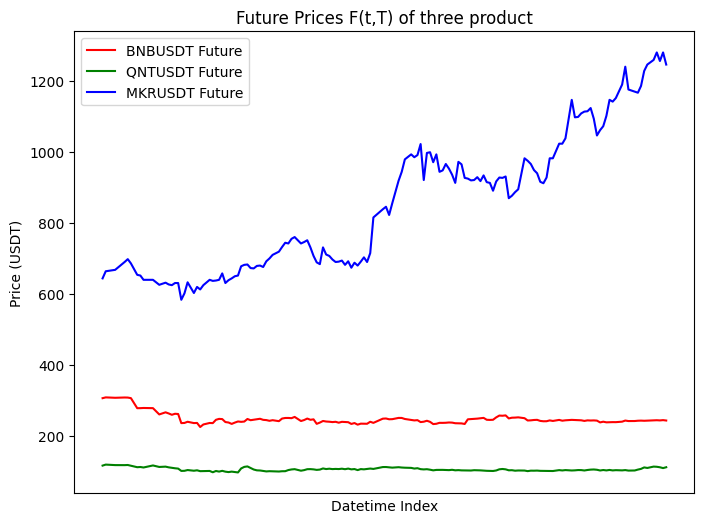

In [78]:
plt.figure(figsize=(8, 6))
plt.plot(F_theory.index,F_theory, 'r-', label='BNBUSDT Future')
plt.plot(F_theory_qnt.index,F_theory_qnt, 'g-', label='QNTUSDT Future')
plt.plot(F_theory_mkr.index,F_theory_mkr, 'b-', label='MKRUSDT Future')
plt.xlabel('Datetime Index')
plt.ylabel('Price (USDT)')
plt.xticks([]) 
plt.title('Future Prices F(t,T) of three product')
plt.legend()
plt.show()


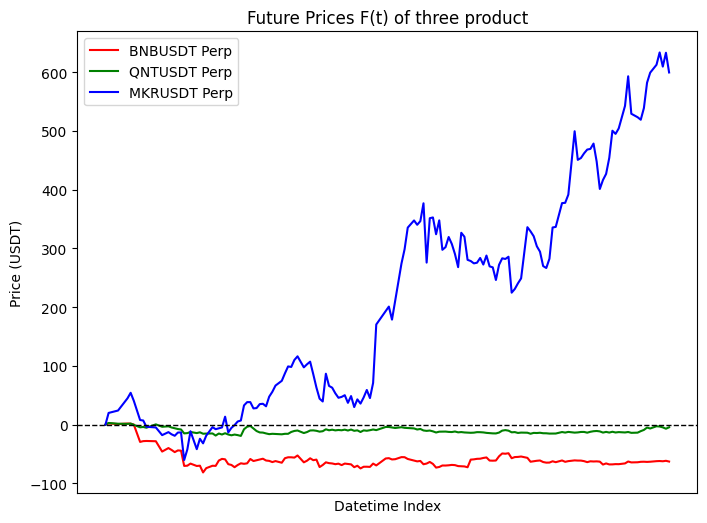

In [134]:
plt.figure(figsize=(8, 6))
plt.plot(F_perpetual_theory.index, F_perpetual_theory, 'r-', label='BNBUSDT Perp')
plt.plot(F_perpetual_theory_qnt.index, F_perpetual_theory_qnt, 'g-', label='QNTUSDT Perp')
plt.plot(F_perpetual_theory_mkr.index, F_perpetual_theory_mkr, 'b-', label='MKRUSDT Perp')
plt.xlabel('Datetime Index')
plt.ylabel('Price (USDT)')
plt.xticks([]) 
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Future Prices F(t) of three product')
plt.legend()
plt.show()


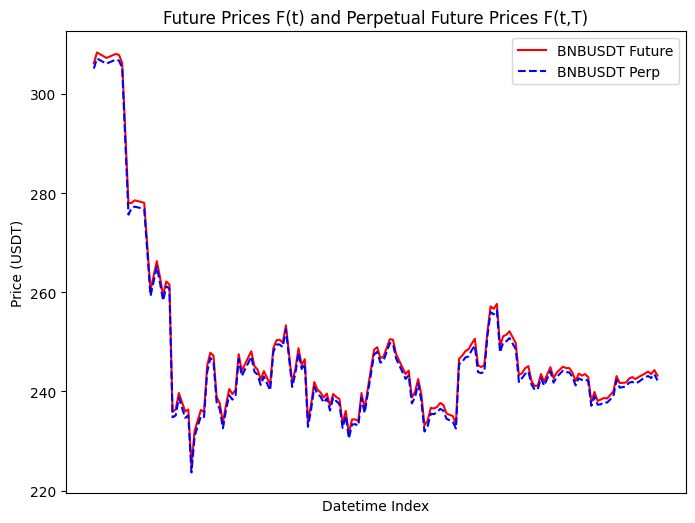

In [81]:
plt.figure(figsize=(8, 6))
plt.plot(F_theory.index,F_theory, 'r-', label='BNBUSDT Future')
plt.plot(F_perpetual_theory.index, F_perpetual_theory, 'b--', label='BNBUSDT Perp')
plt.xlabel('Datetime Index')
plt.ylabel('Price (USDT)')
plt.xticks([]) 
plt.title('Future Prices F(t) and Perpetual Future Prices F(t,T)')
plt.legend()
plt.show()

In [140]:
merged['Close'].head(1)

datetime
2023-06-01 16:00:00    304.9
Name: Close, dtype: float64

In [137]:
merged_mkr['Close'].head(1)

datetime
2023-06-01 16:00:00    641.0
Name: Close, dtype: float64

In [138]:
merged_qnt['Close'].head(1)

datetime
2023-06-01 16:00:00    115.7
Name: Close, dtype: float64

In [145]:
304.9*np.exp(0.03*0.167)

306.4313819085289

In [146]:
115.7*np.exp(0.03*0.167)

116.28111146873334

In [142]:
641*np.exp(0.03*0.167)

644.2194680333455

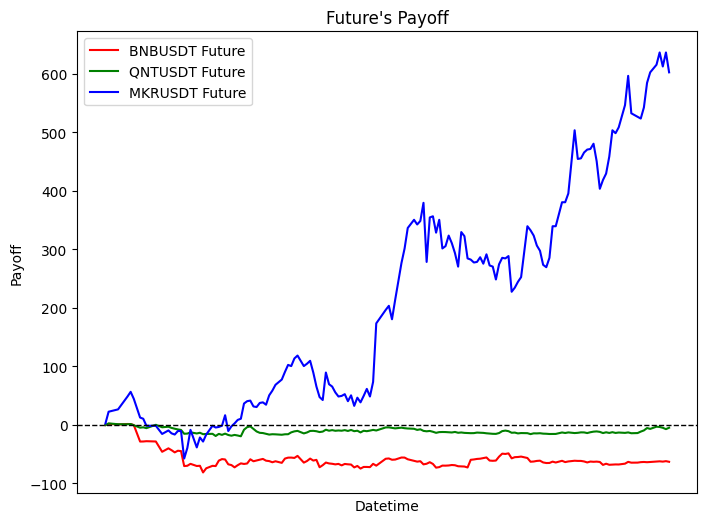

In [147]:
# payoff vs datatime

future_payoff = np.exp(-r * T_t_constant) * (F_theory - 306.4)  # 306.4 is the pricing using spot price at starting of data(first day) mutiply exp(0.03*0.167)
future_payoff_qnt = np.exp(-r * T_t_constant) * (F_theory_qnt - 116.3)
future_payoff_mkr = np.exp(-r * T_t_constant) * (F_theory_mkr - 641.0)
plt.figure(figsize=(8, 6))
plt.plot(future_payoff.index, future_payoff, 'r-', label = 'BNBUSDT Future')
plt.plot(future_payoff_qnt.index, future_payoff_qnt, 'g-', label='QNTUSDT Future')
plt.plot(future_payoff_mkr.index, future_payoff_mkr, 'b-', label='MKRUSDT Future')
plt.xlabel('Datetime')
plt.ylabel('Payoff')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xticks([]) 
plt.title('Future\'s Payoff')
plt.legend()
plt.show()

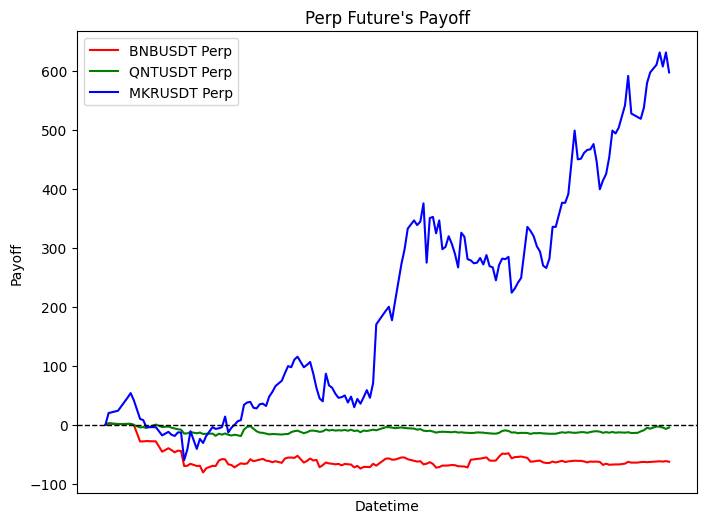

In [97]:
# First timestamp 

merged['time_elapsed'] = (merged.index - merged.index[0]).total_seconds() / (365 * 24 * 3600)

perpetual_futures_payoff = np.exp(-r * merged['time_elapsed']) * (merged['close'] - merged['Close'])  # perp future payoff = e^(-r * (time elapsed))  *  (future price - spot price)
perpetual_futures_payoff_mkr = np.exp(-r * merged['time_elapsed']) * (merged_mkr['close'] - merged_mkr['Close']) 
perpetual_futures_payoff_qnt = np.exp(-r * merged['time_elapsed']) * (merged_qnt['close'] - merged_qnt['Close']) 

plt.figure(figsize=(8, 6))
plt.plot(perpetual_futures_payoff.index, future_payoff, 'r-',label='BNBUSDT Perp')
plt.plot(perpetual_futures_payoff_qnt.index, future_payoff_qnt, 'g-',label='QNTUSDT Perp')
plt.plot(perpetual_futures_payoff_mkr.index, future_payoff_mkr, 'b-',label='MKRUSDT Perp')
plt.xlabel('Datetime')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xticks([]) 
plt.title('Perp Future\'s Payoff')
plt.ylabel('Payoff')
plt.legend()
plt.show()

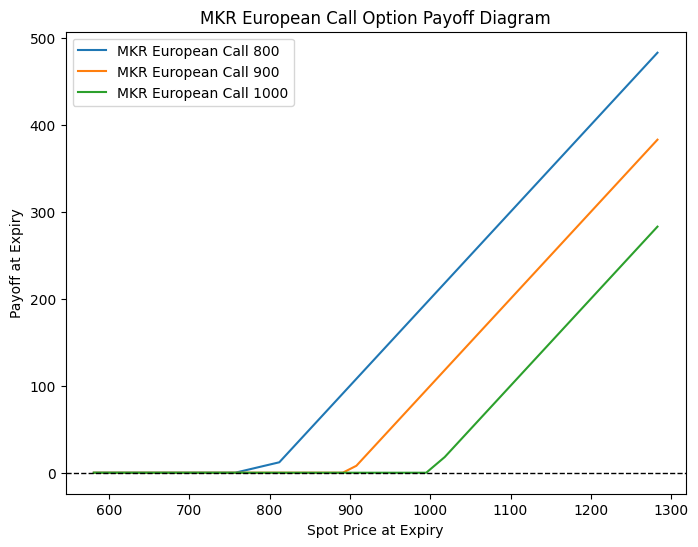

In [118]:
# Data for MKR
spot_price_option_mkr = spot_mkr.loc[starting_date1:ending_date1]
spot_range_mkr = np.sort(np.unique(spot_price_option_mkr['Close']))
strike_prices_mkr = [800,900,1000]

plt.figure(figsize=(8, 6))
for strike in strike_prices_mkr:
    payoff = np.maximum(0, spot_range_mkr - strike)
    plt.plot(spot_range_mkr, payoff, label=f"MKR European Call {strike}")
    
plt.xlabel('Spot Price at Expiry')
plt.ylabel('Payoff at Expiry')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('MKR European Call Option Payoff Diagram')
plt.legend()
plt.show()


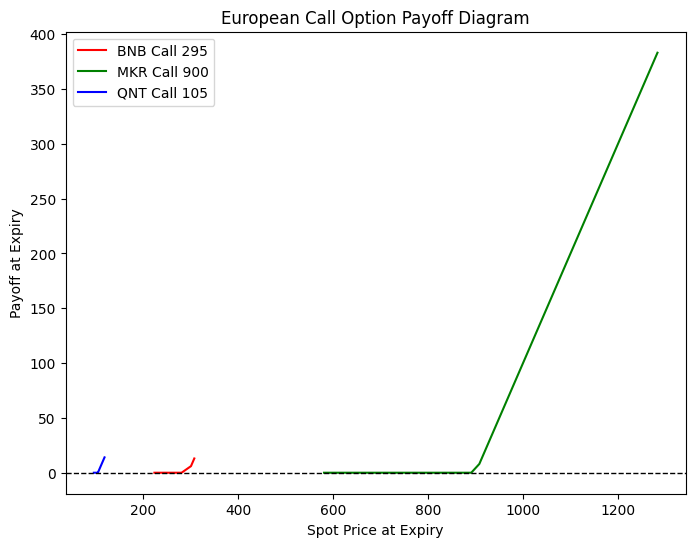

In [106]:
# Initialize an empty plot
plt.figure(figsize=(8, 6))

# Data for BNB
spot_price_option = spot_bnb.loc[starting_date1:ending_date1]
spot_range = np.sort(np.unique(spot_price_option['Close']))
strike_prices = [295]
for strike in strike_prices:
    payoff = np.maximum(0, spot_range - strike)
    plt.plot(spot_range, payoff, 'r-', label=f"BNB Call {strike}")

# Data for MKR
spot_price_option_mkr = spot_mkr.loc[starting_date1:ending_date1]
spot_range_mkr = np.sort(np.unique(spot_price_option_mkr['Close']))
strike_prices_mkr = [900]
for strike in strike_prices_mkr:
    payoff = np.maximum(0, spot_range_mkr - strike)
    plt.plot(spot_range_mkr, payoff, 'g-', label=f"MKR Call {strike}")

# Data for QNT
spot_price_option_qnt = spot_qnt.loc[starting_date1:ending_date1]
spot_range_qnt = np.sort(np.unique(spot_price_option_qnt['Close']))
strike_prices_qnt = [105]
for strike in strike_prices_qnt:
    payoff = np.maximum(0, spot_range_qnt - strike)
    plt.plot(spot_range_qnt, payoff, 'b-', label=f"QNT Call {strike}")

# Additional plot settings
plt.xlabel('Spot Price at Expiry')
plt.ylabel('Payoff at Expiry')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('European Call Option Payoff Diagram')
plt.legend()
plt.show()


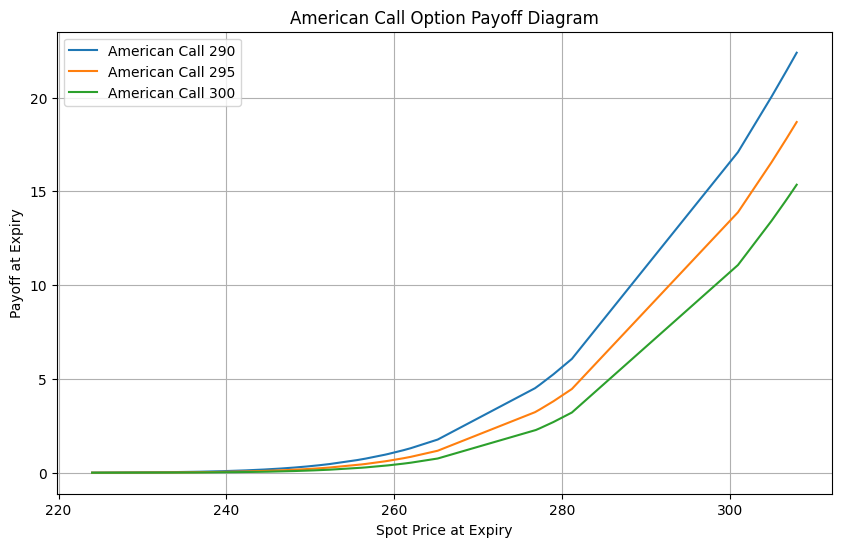

In [ ]:
# Black-Scholes formulas for call prices
def call_price(d1, d2, S_option, K_option, r, t):
    C = S_option * norm.cdf(d1) - K_option * np.exp(-r * t) * norm.cdf(d2)
    return C

# Utility function to calculate the d1 and d2 values that are needed above
def d(S_option, K_option, r, sigma, t):
    d1 = (np.log(S_option / K_option) + (r + sigma ** 2 / 2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return d1, d2

# For illustration, assuming spot_price_option and strike_prices are arrays or pandas Series
S_option = spot_range
K_option = strike_prices
r = 0.03
sigma = 0.2  # assumed sigma = 0.2
t = 0.167  # Approximately 2 months expressed in years

# Initialize plot
plt.figure(figsize=(10, 6))

# Loop through strike prices
for K_option in strike_prices:
    d1, d2 = d(S_option, K_option, r, sigma, t)
    european_call = call_price(d1, d2, S_option, K_option, r, t)
    
    # For American Call Option
    # American call option payoff is the maximum of the European option price and (S - K)
    american_call_payoff = np.maximum(S_option - K_option, european_call)
    
    plt.plot(S_option, american_call_payoff, label=f'American Call {K_option}')

plt.title('American Call Option Payoff Diagram')
plt.xlabel('Spot Price at Expiry')
plt.ylabel('Payoff at Expiry')
plt.legend()
plt.grid(True)
plt.show()



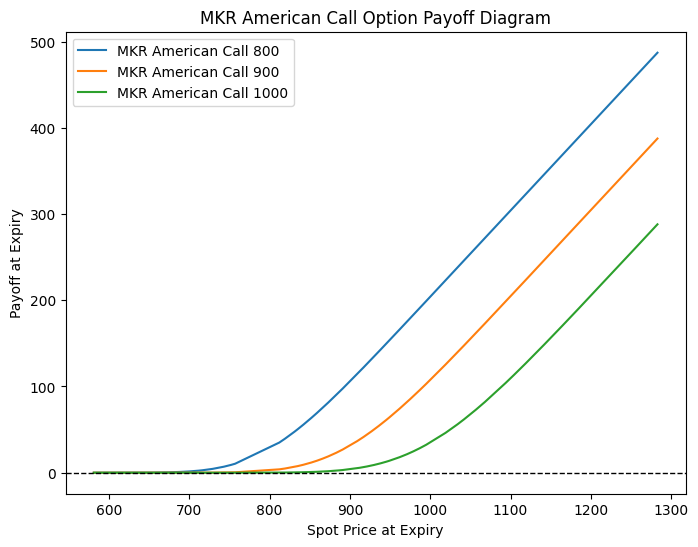

In [119]:
# Your Black-Scholes functions
def call_price(d1, d2, S_option, K_option, r, t):
    C = S_option * norm.cdf(d1) - K_option * np.exp(-r * t) * norm.cdf(d2)
    return C

def d(S_option, K_option, r, sigma, t):
    d1 = (np.log(S_option / K_option) + (r + sigma ** 2 / 2) * t) / (sigma * np.sqrt(t))
    d2 = d1 - sigma * np.sqrt(t)
    return d1, d2

# Initialize the plot
plt.figure(figsize=(8, 6))

# Assuming spot_price_option_mkr and strike_prices_mkr are arrays or pandas Series
spot_price_option_mkr = spot_mkr.loc[starting_date1:ending_date1]
spot_range_mkr = np.sort(np.unique(spot_price_option_mkr['Close']))
strike_prices_mkr = [800, 900, 1000]
S_option = spot_range_mkr
r = 0.03  # Risk-free rate
sigma = 0.2  # Volatility
t = 0.167  # Time to expiry in years

# Loop through the strike prices for MKR
for K_option in strike_prices_mkr:
    d1, d2 = d(S_option, K_option, r, sigma, t)
    european_call = call_price(d1, d2, S_option, K_option, r, t)
    
    # American call option payoff
    american_call_payoff = np.maximum(S_option - K_option, european_call)
    
    plt.plot(S_option, american_call_payoff, label=f'MKR American Call {K_option}')

# Additional plot settings
plt.xlabel('Spot Price at Expiry')
plt.ylabel('Payoff at Expiry')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('MKR American Call Option Payoff Diagram')
plt.legend()
plt.show()

In [194]:
merged.head()

,Timestamp,Open,High,Low,Close,Volume,Close_Time,Quote_Volume,Count,Taker_Buy_Volume,...,volume,close_time,quote_volume,count,taker_buy_volume,taker_buy_quote_volume,ignore,calc_time,funding_interval_hours,last_funding_rate
datetime,,,,,,,,,,,,,,,,,,,,,
2023-06-01 16:00:00,1685635200000,304.9,306.6,303.5,304.9,66459.341,1685663999999,2.027835e+07,36962,35854.963,...,194939.63,1685663999999,5.951180e+07,105169,100324.00,3.063274e+07,0,1685635200000,8,0.000000e+00
2023-06-02 00:00:00,1685664000000,304.9,308.4,303.1,307.1,117634.974,1685692799999,3.606950e+07,47600,64541.337,...,267327.75,1685692799999,8.199466e+07,135779,139195.73,4.269483e+07,0,1685664000000,8,0.000000e+00
2023-06-03 00:00:00,1685750400000,307.3,307.4,303.0,306.0,49296.596,1685779199999,1.508196e+07,31541,23386.721,...,111821.69,1685779199999,3.425319e+07,64159,54634.81,1.673456e+07,0,1685750400000,8,7.832000e-05
2023-06-04 00:00:00,1685836800000,306.6,306.8,305.6,306.8,39498.575,1685865599999,1.209062e+07,26368,19960.367,...,99579.68,1685865599999,3.050888e+07,55908,51719.07,1.584492e+07,0,1685836800000,8,1.700000e-07
2023-06-04 08:00:00,1685865600000,306.8,307.6,306.5,306.6,66343.093,1685894399999,2.036951e+07,35804,33085.266,...,140773.71,1685894399999,4.325817e+07,72307,66418.51,2.040888e+07,0,1685865600000,8,3.122000e-05


In [389]:
import pandas as pd
import matplotlib.pyplot as plt

# Helper function for clamping
def clamp_series(value_series, lower, upper):
    return value_series.clip(lower=lower, upper=upper)

# Premium Index Calculation for each exchange
def premium_index_bybit(impact_bid_prices, price_index, impact_ask_prices, funding_rate_current_interval):
    return ((impact_bid_prices - price_index).clip(lower=0) - (price_index - impact_ask_prices).clip(lower=0)) / price_index + funding_rate_current_interval

def premium_index_bitmex(impact_bid_prices, mark_price, price_index, impact_ask_prices, spot_prices, impact_mid_prices):
    fair_basis = merged['last_funding_rate'] * (8 / 3)  # (Time Until Funding / Funding Interval) https://www.bitmex.com/app/fairPriceMarking
    return ((impact_bid_prices - mark_price).clip(lower=0) - (price_index - impact_ask_prices).clip(lower=0)) / spot_prices + fair_basis

def premium_index_bitget(impact_bid_prices, price_index, spot_prices, impact_ask_prices):
    return ((impact_bid_prices - price_index).clip(lower=0) - (spot_prices - impact_ask_prices).clip(lower=0)) / spot_prices

def premium_index_binance(impact_bid_prices, price_index, impact_ask_prices):
    return ((impact_bid_prices - price_index).clip(lower=0) - (price_index - impact_ask_prices).clip(lower=0)) / price_index

# Funding Rate Calculation
def common_funding_rate(premium_index_series, interest_rate):
    clamp_value = (interest_rate - premium_index_series).clip(lower=-0.0005, upper=0.0005)
    return premium_index_series + clamp_value


best_bids = merged['High']
worst_bids = merged['Low']
best_asks = merged['high'] + 0.12
worst_asks = merged['low']

spot_prices = merged['High'] + 0.1

# Calculate impact bid and ask prices
impact_bid_prices = (best_bids + worst_bids) / 2
impact_ask_prices = (best_asks + worst_asks) / 2
impact_mid_prices = (best_bids + best_asks) / 2

mark_price = merged['Close'] + 0.2

# Calculate bid-ask spread
bid_ask_spreads = best_asks - best_bids

# Calculate premium indices and funding rates
interest_rate = 0.0003  # Single interest rate
price_index = (merged['Close']+merged['close'])/2  # Example index price

funding_rate_current_interval_bybit = 0.00005  # Could be other numbers  https://www.bybit.com/en-US/help-center/s/article/What-is-funding-rate-and-predicted-rate

# Calculate for each exchange
premium_indices_bybit = premium_index_bybit(impact_bid_prices, price_index, impact_ask_prices, funding_rate_current_interval_bybit)
funding_rates_bybit = common_funding_rate(premium_indices_bybit, interest_rate)

funding_rate_current_interval_bybit = funding_rates_bybit.iloc[0]  # taken the first row of funding rate for BNB funding rate



premium_indices_bitmex = premium_index_bitmex(impact_bid_prices, mark_price, price_index, impact_ask_prices, spot_prices, impact_mid_prices)
funding_rates_bitmex = common_funding_rate(premium_indices_bitmex, interest_rate)

premium_indices_bitget = premium_index_bitget(impact_bid_prices, price_index, spot_prices, impact_ask_prices)
funding_rates_bitget = common_funding_rate(premium_indices_bitget, interest_rate)

premium_indices_binance = premium_index_binance(impact_bid_prices, price_index, impact_ask_prices)
funding_rates_binance = common_funding_rate(premium_indices_binance, interest_rate)

# Convert to Series for plotting
funding_rates_bybit_series = pd.Series(funding_rates_bybit, index=bid_ask_spreads.index)
funding_rates_bitmex_series = pd.Series(funding_rates_bitmex, index=bid_ask_spreads.index)
funding_rates_bitget_series = pd.Series(funding_rates_bitget, index=bid_ask_spreads.index)
funding_rates_binance_series = pd.Series(funding_rates_binance, index=bid_ask_spreads.index)


In [390]:
print(premium_indices_bybit)

datetime
2023-06-01 16:00:00    0.000181
2023-06-02 00:00:00   -0.003646
2023-06-03 00:00:00    0.000050
2023-06-04 00:00:00   -0.001237
2023-06-04 08:00:00    0.001322
                         ...   
2023-07-30 00:00:00   -0.001001
2023-07-30 08:00:00    0.000050
2023-07-30 16:00:00   -0.001290
2023-07-31 00:00:00    0.000050
2023-07-31 08:00:00    0.002878
Length: 157, dtype: float64


In [391]:
print(premium_indices_binance)

datetime
2023-06-01 16:00:00    0.000131
2023-06-02 00:00:00   -0.003696
2023-06-03 00:00:00    0.000000
2023-06-04 00:00:00   -0.001287
2023-06-04 08:00:00    0.001272
                         ...   
2023-07-30 00:00:00   -0.001051
2023-07-30 08:00:00    0.000000
2023-07-30 16:00:00   -0.001340
2023-07-31 00:00:00    0.000000
2023-07-31 08:00:00    0.002828
Length: 157, dtype: float64


In [392]:
print(premium_indices_bitmex)

datetime
2023-06-01 16:00:00    0.000000
2023-06-02 00:00:00   -0.003679
2023-06-03 00:00:00    0.000209
2023-06-04 00:00:00   -0.001287
2023-06-04 08:00:00    0.000896
                         ...   
2023-07-30 00:00:00   -0.000919
2023-07-30 08:00:00    0.000213
2023-07-30 16:00:00   -0.001030
2023-07-31 00:00:00    0.000246
2023-07-31 08:00:00    0.002244
Length: 157, dtype: float64


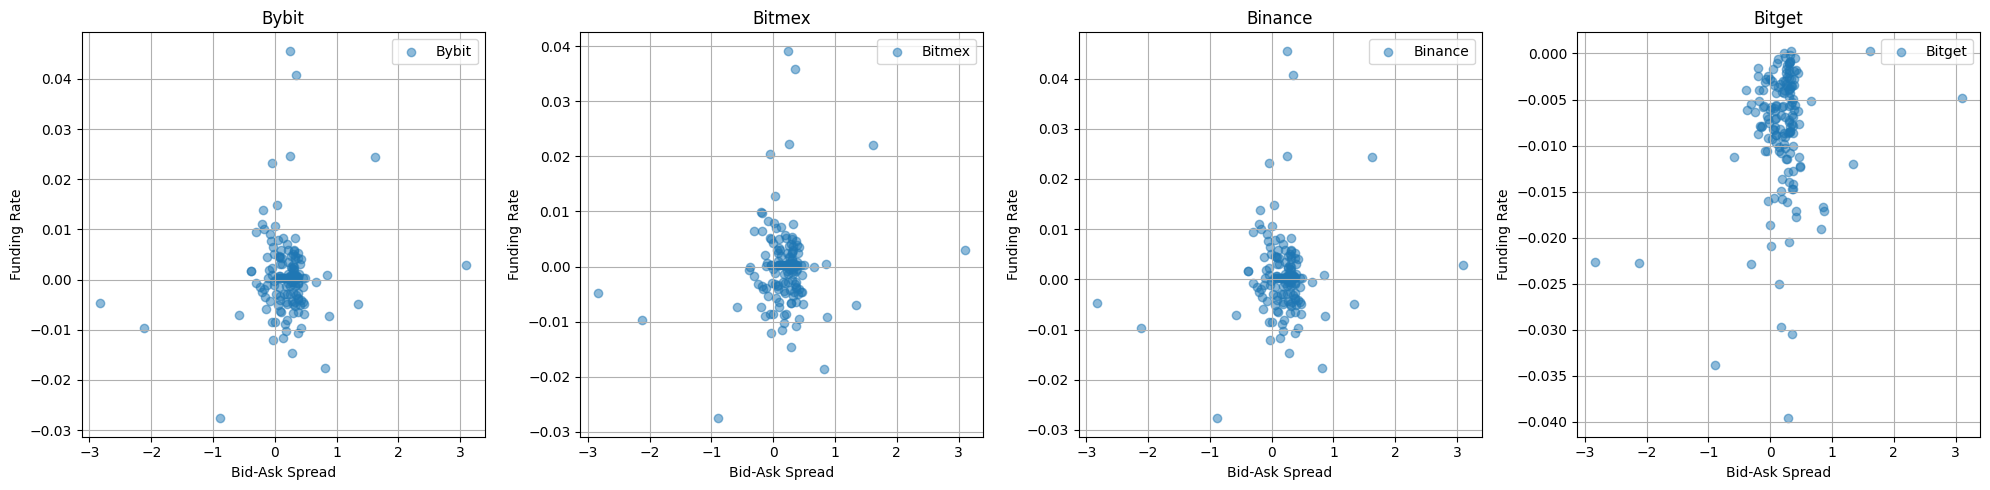

In [393]:
# Create a 1x4 grid of plots: one row, four columns
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# Plot for Bybit
axs[0].scatter(bid_ask_spreads, funding_rates_bybit, label='Bybit', alpha=0.5)
axs[0].set_title('Bybit')
axs[0].set_xlabel('Bid-Ask Spread')
axs[0].set_ylabel('Funding Rate')
axs[0].grid(True)
axs[0].legend()

# Plot for Bitmex
axs[1].scatter(bid_ask_spreads, funding_rates_bitmex, label='Bitmex', alpha=0.5)
axs[1].set_title('Bitmex')
axs[1].set_xlabel('Bid-Ask Spread')
axs[1].set_ylabel('Funding Rate')
axs[1].grid(True)
axs[1].legend()

# Plot for Binance
axs[2].scatter(bid_ask_spreads, funding_rates_binance, label='Binance', alpha=0.5)
axs[2].set_title('Binance')
axs[2].set_xlabel('Bid-Ask Spread')
axs[2].set_ylabel('Funding Rate')
axs[2].grid(True)
axs[2].legend()

# Plot for Bighet
axs[3].scatter(bid_ask_spreads, funding_rates_bitget, label='Bitget', alpha=0.5)
axs[3].set_title('Bitget')
axs[3].set_xlabel('Bid-Ask Spread')
axs[3].set_ylabel('Funding Rate')
axs[3].grid(True)
axs[3].legend()

# Show the plot
plt.tight_layout()
plt.show()


In [394]:
# Helper function for clamping
def clamp(value, lower, upper):
    return min(max(value, lower), upper)

# Calculate Premium Index
def calculate_premium_index(best_bids, best_asks, price_index,interest_rate):
    midpoint = (best_bids + best_asks) / 2
    premium_index_interest = (midpoint - price_index) / price_index - interest_rate
    return premium_index_interest

# Calculate the cumulative moving average of the Premium Index-interet_rate
def calculate_cumulative_ma(premium_index_interests):
    return premium_index_interests.expanding().mean()


best_bids = merged['High']
best_asks = merged['high']
price_index = (merged['Close'] + merged['close']) / 2  # Spot index price
interest_rate = 0.0003  # Example interest rate

# Step 2: Calculate the premium index
premium_index_interests = calculate_premium_index(best_bids, best_asks, price_index, interest_rate)

# Step 3: Calculate the cumulative moving average of Premium Index
cumulative_ma_premium_index = calculate_cumulative_ma( premium_index_interests)

# Step 4: Calculate the funding rate
a, b = -0.005, 0.005  # Clamping bounds
okx_funding_rates = cumulative_ma_premium_index.apply(lambda x: clamp(x, a, b))



In [395]:
# Helper function for clamping
def clamp(value, lower, upper):
    return min(max(value, lower), upper)

# Calculate Premium Index
def calculate_premium_index(best_bids, best_asks, price_index,interest_rate):
    midpoint = (best_bids + best_asks) / 2
    premium_index_interest = (midpoint - price_index) / price_index - interest_rate
    return premium_index_interest

# Calculate the cumulative moving average of the Premium Index-interet_rate
def calculate_cumulative_ma(premium_index_interests):
    return premium_index_interests.expanding().mean()


best_bids = merged['High']
worst_bids = merged['Low']
best_asks = merged['high'] + 0.12
worst_asks = merged['low']

spot_prices = merged['High'] + 0.1

price_index = (merged['Close'] + merged['close']) / 2  # Spot index price
interest_rate = 0.0003  # Example interest rate

# Step 2: Calculate the premium index
premium_index_interests = calculate_premium_index(best_bids, best_asks, price_index, interest_rate)

# Step 3: Calculate the cumulative moving average of Premium Index
cumulative_ma_premium_index = calculate_cumulative_ma( premium_index_interests)

# Step 4: Calculate the funding rate
c, d = -0.0075, 0.0075  # Clamping bounds
coinex_funding_rates = cumulative_ma_premium_index.apply(lambda x: clamp(x, c, d))


In [396]:
merged['High']

datetime
2023-06-01 16:00:00    306.6
2023-06-02 00:00:00    308.4
2023-06-03 00:00:00    307.4
2023-06-04 00:00:00    306.8
2023-06-04 08:00:00    307.6
                       ...  
2023-07-30 00:00:00    242.9
2023-07-30 08:00:00    243.7
2023-07-30 16:00:00    243.8
2023-07-31 00:00:00    244.5
2023-07-31 08:00:00    244.1
Name: High, Length: 157, dtype: float64

In [397]:
merged['high']

datetime
2023-06-01 16:00:00    306.71
2023-06-02 00:00:00    308.63
2023-06-03 00:00:00    307.44
2023-06-04 00:00:00    307.00
2023-06-04 08:00:00    307.82
                        ...  
2023-07-30 00:00:00    243.04
2023-07-30 08:00:00    244.03
2023-07-30 16:00:00    244.06
2023-07-31 00:00:00    244.71
2023-07-31 08:00:00    244.25
Name: high, Length: 157, dtype: float64

In [398]:
merged['Low']

datetime
2023-06-01 16:00:00    303.5
2023-06-02 00:00:00    303.1
2023-06-03 00:00:00    303.0
2023-06-04 00:00:00    305.6
2023-06-04 08:00:00    306.5
                       ...  
2023-07-30 00:00:00    241.6
2023-07-30 08:00:00    241.9
2023-07-30 16:00:00    240.3
2023-07-31 00:00:00    242.2
2023-07-31 08:00:00    241.7
Name: Low, Length: 157, dtype: float64

In [399]:
merged['low']

datetime
2023-06-01 16:00:00    303.52
2023-06-02 00:00:00    303.22
2023-06-03 00:00:00    305.10
2023-06-04 00:00:00    305.83
2023-06-04 08:00:00    306.71
                        ...  
2023-07-30 00:00:00    241.80
2023-07-30 08:00:00    242.18
2023-07-30 16:00:00    240.39
2023-07-31 00:00:00    242.39
2023-07-31 08:00:00    241.80
Name: low, Length: 157, dtype: float64

In [400]:
# Helper function for clamping
def clamp_series(value_series, lower, upper):
    return value_series.clip(lower=lower, upper=upper)

# dYdX
def dydx_funding_rate(impact_bid_price, price_index, impact_ask_price):
    return ((impact_bid_price - price_index).clip(lower=0)- (price_index - impact_ask_price).clip(lower=0)) / price_index / 8 + 0.00001

# Assuming `merged` is your DataFrame
best_bids = merged['High']
worst_bids = merged['Low']
best_asks = merged['high'] + 0.12
worst_asks = merged['low']

spot_prices = merged['High'] + 0.1

# Calculate impact bid and ask prices
impact_bid_prices = (best_bids + worst_bids) / 2
impact_ask_prices = (best_asks + worst_asks) / 2
impact_mid_prices = (best_bids + best_asks) / 2

mark_price = merged['Open']+0.2  # Assume mark price is the Open price of BNB spot kilines

# Calculate bid-ask spread
bid_ask_spreads = best_asks - best_bids

# Calculate premium indices and funding rates
interest_rate = 0.0003  # Single interest rate, numbers
price_index = (merged['Close']+merged['close'])/2  # Example index price

dydx_funding_rates = dydx_funding_rate(impact_bid_prices, price_index, impact_ask_prices)


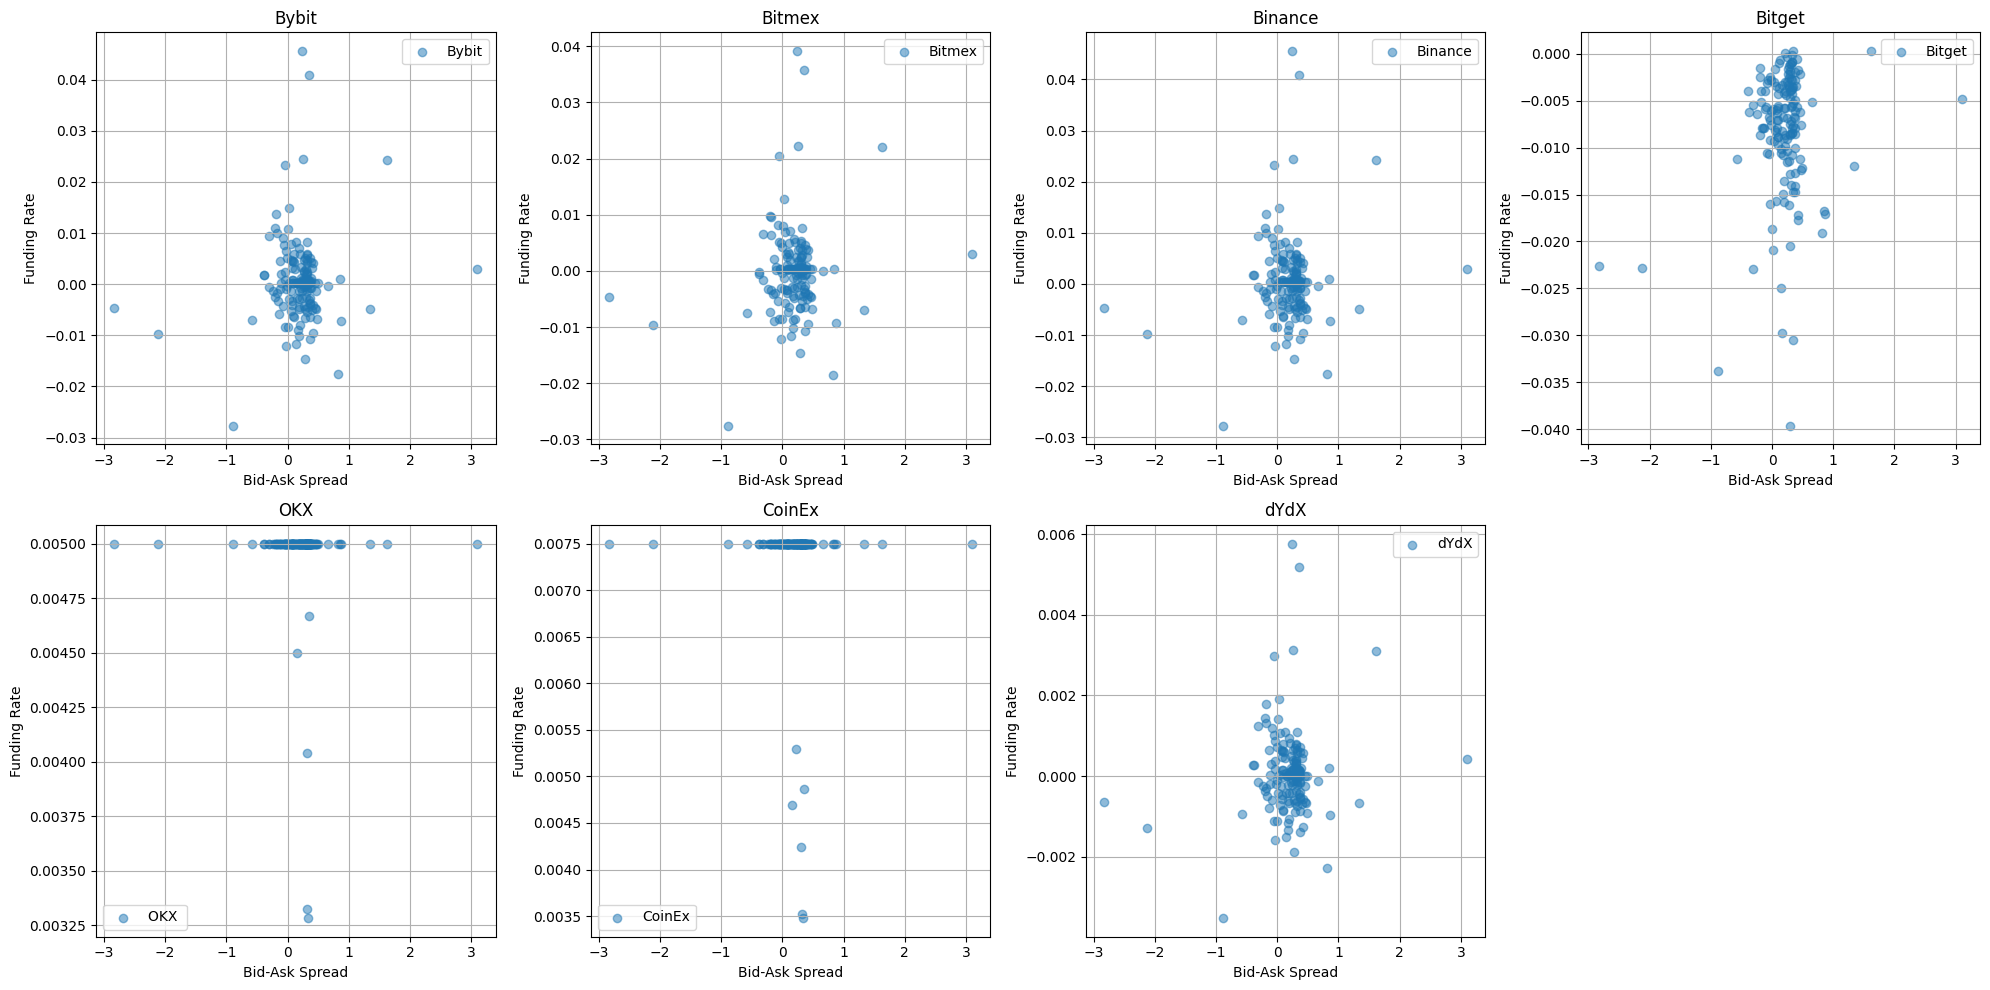

In [401]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# First row of plots
# Plot for Bybit
axs[0, 0].scatter(bid_ask_spreads, funding_rates_bybit, label='Bybit', alpha=0.5)
axs[0, 0].set_title('Bybit')
axs[0, 0].set_xlabel('Bid-Ask Spread')
axs[0, 0].set_ylabel('Funding Rate')
axs[0, 0].grid(True)
axs[0, 0].legend()

# Plot for Bitmex
axs[0, 1].scatter(bid_ask_spreads, funding_rates_bitmex, label='Bitmex', alpha=0.5)
axs[0, 1].set_title('Bitmex')
axs[0, 1].set_xlabel('Bid-Ask Spread')
axs[0, 1].set_ylabel('Funding Rate')
axs[0, 1].grid(True)
axs[0, 1].legend()

# Plot for Binance
axs[0, 2].scatter(bid_ask_spreads, funding_rates_binance, label='Binance', alpha=0.5)
axs[0, 2].set_title('Binance')
axs[0, 2].set_xlabel('Bid-Ask Spread')
axs[0, 2].set_ylabel('Funding Rate')
axs[0, 2].grid(True)
axs[0, 2].legend()

# Plot for Bitget
axs[0, 3].scatter(bid_ask_spreads, funding_rates_bitget, label='Bitget', alpha=0.5)
axs[0, 3].set_title('Bitget')
axs[0, 3].set_xlabel('Bid-Ask Spread')
axs[0, 3].set_ylabel('Funding Rate')
axs[0, 3].grid(True)
axs[0, 3].legend()

# Second row of plots
# Plot for OKX 
axs[1, 0].scatter(bid_ask_spreads, okx_funding_rates, label='OKX ', alpha=0.5)
axs[1, 0].set_title('OKX')
axs[1, 0].set_xlabel('Bid-Ask Spread')
axs[1, 0].set_ylabel('Funding Rate')
axs[1, 0].grid(True)
axs[1, 0].legend()

#CoinEX
axs[1, 1].scatter(bid_ask_spreads, coinex_funding_rates, label='CoinEx', alpha=0.5)
axs[1, 1].set_title('CoinEx')
axs[1, 1].set_xlabel('Bid-Ask Spread')
axs[1, 1].set_ylabel('Funding Rate')
axs[1, 1].grid(True)
axs[1, 1].legend()

#dYdX
axs[1, 2].scatter(bid_ask_spreads, dydx_funding_rates, label='dYdX', alpha=0.5)
axs[1, 2].set_title('dYdX')
axs[1, 2].set_xlabel('Bid-Ask Spread')
axs[1, 2].set_ylabel('Funding Rate')
axs[1, 2].grid(True)
axs[1, 2].legend()

# Optionally hide unused subplots in the second row
for i in range(3, 4):
    axs[1, i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()
